# Amazon product review sentiment analysis using Logistic Regression and Linear SVC 


### Exploring our data-set

In [2]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns



In [3]:
df= pd.read_csv('amazonreviews.tsv', sep='\t', dtype=str)
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
# size of dataset
df.shape

(10000, 2)

In [5]:
df['label'].value_counts()


neg    5097
pos    4903
Name: label, dtype: int64

In [6]:
# Removing null values
df.isnull().sum()
df.dropna(inplace=True)


<AxesSubplot:ylabel='label'>

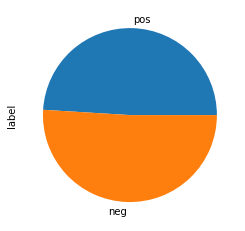

In [7]:
df['label'].value_counts().sort_values().plot(kind = 'pie')


### Cleaning Our data-set

In [8]:
#removing empty strings 
blanks = [] 

for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)     
        
df.drop(blanks, inplace=True)

In [9]:
#split data-set to train and test
X=df['review']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X

0       Stuning even for the non-gamer: This sound tra...
1       The best soundtrack ever to anything.: I'm rea...
2       Amazing!: This soundtrack is my favorite music...
3       Excellent Soundtrack: I truly like this soundt...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used and it is obvio...
9999    Beautiful Pen and Fast Delivery.: The pen was ...
Name: review, Length: 10000, dtype: object

## 1. Logistic Regression 

In [11]:
#Training the model 
from sklearn.linear_model import LogisticRegression
# The pipeline: tf-idf vectorizer and logistic regression model  
lr_model=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',LogisticRegression(solver='lbfgs'))])

lr_model.fit(X_train,y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [12]:
#Visualizing Classification Report 
predictions= lr_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

#df_report.style.background_gradient(cmap='greens').set_precision(2)
cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.840000,0.880000,0.860000,1649.000000
pos,0.870000,0.830000,0.850000,1651.000000
accuracy,0.850000,0.850000,0.850000,0.850000
macro avg,0.850000,0.850000,0.850000,3300.000000
weighted avg,0.850000,0.850000,0.850000,3300.000000


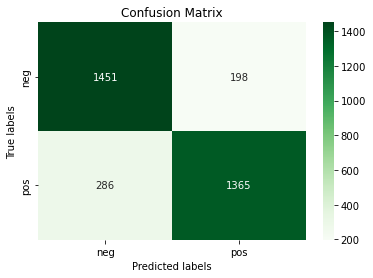

In [13]:
# Visualizing Confusion Matrix 
import matplotlib.pyplot as plt
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

## 2. SVM : Linear SVC 


In [14]:
#pipeline(choose vectorizer, choose model)
my_model=Pipeline([('tfidf', TfidfVectorizer()),('classifier',LinearSVC())])
#the training 
my_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [30]:
import pickle
pickle.dump(my_model, open('my_model.pkl', 'wb'))

In [15]:
#Visualizing Classification Report 
predictions= my_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

#df_report.style.background_gradient(cmap='greens').set_precision(2)
cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.860000,0.890000,0.870000,1649.000000
pos,0.890000,0.850000,0.870000,1651.000000
accuracy,0.870000,0.870000,0.870000,0.870000
macro avg,0.870000,0.870000,0.870000,3300.000000
weighted avg,0.870000,0.870000,0.870000,3300.000000


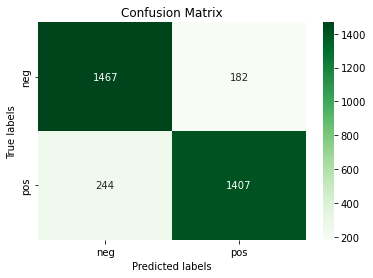

In [16]:
# Visualizing the confision matrix 
predictions=my_model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [17]:
x = my_model.predict(X_test)

In [18]:
x

array(['neg', 'neg', 'neg', ..., 'neg', 'pos', 'pos'], dtype=object)